# 15 minute city - exploratory spatial data analysis

Following:
http://pysal.org/notebooks/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.html

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox

import esda
import pysal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Read local data

In [2]:
c = 'Guadalajara'
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/15_min_city/'

In [ ]:
nodes_15_min = gpd.read_file(grl_dir+f'{c}_15min_Analisis_nodes_vTotals.geojson', driver='GeoJSON')
print(nodes_15_min.shape)
nodes_15_min.head(2)

In [3]:
res = 8
hex_dist_res8 = gpd.read_file(grl_dir+f'{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')
res = 9
hex_dist_res9 = gpd.read_file(grl_dir+f'{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')

In [4]:
print(hex_dist_res8.shape)
hex_dist_res8.head(2)

(1160, 111)


,hex_id_8,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,88498c9483fffff,0.0,21.054314,77.081654,15.462880,34.773808,8.015414,37.792083,66.408639,58.246391,...,1.0,0.475610,0.990244,0.0,0.0,1.990244,1.475610,10.648780,9.351626,"POLYGON ((-103.35482 20.74167, -103.35027 20.7..."
1,8849ab5933fffff,0.0,13.441838,35.545629,8.153209,33.899840,10.423998,24.711934,139.069620,32.786683,...,1.0,0.568436,1.000000,0.5,1.0,3.000000,2.068436,12.201117,10.905028,"POLYGON ((-103.40840 20.64992, -103.40387 20.6..."


In [5]:
print(hex_dist_res9.shape)
hex_dist_res9.head(2)

(6003, 111)


,hex_id_9,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,8949aa252bbffff,0.0,82.776419,296.284598,11.509728,81.590992,77.138481,70.652399,261.494928,80.649753,...,1.0,0.25,1.0,0.0,0.0,2.0,0.768519,6.518519,4.537037,"POLYGON ((-103.40480 20.46253, -103.40358 20.4..."
1,8949ab5943bffff,0.0,39.076549,75.017473,17.406505,35.853914,20.820088,51.367568,197.413242,60.702885,...,1.0,0.25,1.0,0.5,1.0,3.0,1.750000,8.000000,6.555556,"POLYGON ((-103.40982 20.60369, -103.40860 20.6..."


## Data analysis

In [ ]:
columns_analysis = ['Preescolar','Primaria','Secundaria',
             'Salud','Gobierno','Cuidado',
              'Básicos','Personal','Hogar',
            'Complementarios',
              'Social','Actividad física','Cultural'
             ]
hex_dist_res9.sort_values(columns_analysis[0],inplace=True)
hex_dist_res9.reset_index(drop=True, inplace=True)
plt.scatter(hex_dist_res9.index,hex_dist_res9[columns_analysis[0]])

In [ ]:
y = hex_dist_res9['raw_'+columns_analysis[0]]

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,16), subplot_kw={'aspect':'equal'})

i = 0

for row in range(len(ax)):

    for column in range(len(ax[0])):

        hex_dist_res9.plot(column=columns_analysis[i], cmap='binary', linewidth=0.4,
                           edgecolor='grey', ax=ax[row][column])
        ax[row][column].set_axis_off()
        ax[row][column].set_title(columns_analysis[i])
        
        i += 1
fig.tight_layout()

### Limits analysis

In [ ]:
idx_15_min = {'Escuelas':{'Preescolar':['denue_preescolar'],
                         'Primaria':['denue_primaria'],
                         'Secundaria':['denue_secundaria']},
             'Servicios comunitarios':{'Salud':['clues_primer_nivel'],
                                      'Gobierno':['sip_centro_admin'],
                                      'Guarderías':['denue_guarderias'],
                                      'Adultos mayores':['denue_casa_adultos_mayores'],
                                      'Otros':['denue_dif']},
              'Comercio':{'Alimentos':['denue_supermercado','denue_abarrotes',
                                    'denue_carnicerias','sip_mercado'],
                         'Personal':['denue_peluqueria'],
                          'Farmacias':['denue_farmacias'],
                         'Hogar':['denue_ferreteria_tlapaleria','denue_art_limpieza'],
                         'Complementarios':['denue_ropa','denue_calzado','denue_muebles',
                                           'denue_lavanderia','denue_revistas_periodicos',
                                           'denue_pintura']},
              'Entretenimiento':{'Social':['denue_restaurante_insitu','denue_restaurante_llevar',
                                          'denue_bares','denue_cafe'],
                                'Actividad física':['sip_cancha','sip_unidad_deportiva',
                                                   'sip_espacio_publico','denue_parque_natural'],
                                'Cultural':['denue_cines','denue_museos']} 
             }

wegiht_idx = {'Escuelas':{'Preescolar':1,
                         'Primaria':1,
                         'Secundaria':1},
             'Servicios comunitarios':{'Salud':1,
                                      'Gobierno':1,
                                      'Guarderías':1,
                                      'Adultos mayores':1,
                                      'Otros':1},
              'Comercio':{'Alimentos':1,
                         'Personal':1,
                          'Farmacias':1,
                         'Hogar':2,
                         'Complementarios':6},
              'Entretenimiento':{'Social':4,
                                'Actividad física':1,
                                'Cultural':1}
             }

tiempos_15_min = {'denue_preescolar':[5,'peatonal'],
                 'denue_primaria':[5,'peatonal'],
                 'denue_secundaria':[15,'peatonal'],
                  'denue_escuela_mixta':[15,'peatonal'],
                 'clues_primer_nivel':[5,'peatonal'],
                 'sip_centro_admin':[10,'bicicleta'],
                 'denue_guarderias':[5,'peatonal'],
                 'denue_casa_adultos_mayores':[5,'peatonal'],
                 'denue_dif':[10,'bicicleta'],
                 'denue_supermercado':[5,'peatonal'],
                 'denue_abarrotes':[5,'peatonal'],
                 'denue_carnicerias':[5,'peatonal'],
                 'sip_mercado':[5,'peatonal'],
                 'denue_peluqueria':[10,'bicicleta'],
                  'denue_farmacias':[5,'peatonal'],
                  'denue_ferreteria_tlapaleria':[15,'peatonal'],
                  'denue_art_limpieza':[15,'peatonal'],
                  'denue_ropa':[15,'peatonal'],
                  'denue_calzado':[15,'peatonal'],
                  'denue_muebles':[15,'peatonal'],
                  'denue_lavanderia':[15,'peatonal'],
                  'denue_revistas_periodicos':[15,'peatonal'],
                  'denue_pintura':[15,'peatonal'],
                  'denue_restaurante_insitu':[15,'peatonal'],
                  'denue_restaurante_llevar':[15,'peatonal'],
                  'denue_bares':[15,'peatonal'],
                  'denue_cafe':[15,'peatonal'],
                  'sip_cancha':[5,'peatonal'],
                  'sip_unidad_deportiva':[5,'peatonal'],
                  'sip_espacio_publico':[5,'peatonal'],
                  'denue_parque_natural':[10,'bicicleta'],
                  'denue_cines':[10,'bicicleta'],
                  'denue_museos':[10,'bicicleta']
                 }

In [ ]:
# create gdf for analysis
nodes_analysis = nodes_15_min.copy()

# determines whether a certain amenity is within the limit time 
for amenidad in list(tiempos_15_min.keys()):
    # creates column to save whether a amenity is within the limit time
    idx_column_name = 'idx' + amenidad[amenidad.find('_'):]
    nodes_analysis[idx_column_name] = 0
    
    if tiempos_15_min[amenidad][1] == 'peatonal':
        tiempo_limite = tiempos_15_min[amenidad][0]
    else:
        tiempo_limite = tiempos_15_min[amenidad][0] * 3
        
    idx_amenidad = nodes_analysis[amenidad] <= tiempo_limite
    nodes_analysis.loc[idx_amenidad, idx_column_name] = 1
    
    dif_time_column = 'time_dif_' + amenidad[amenidad.find('_'):]
    nodes_analysis[dif_time_column] = nodes_analysis[amenidad].apply(lambda x: x - tiempo_limite)
    idx_tiempo = nodes_analysis[dif_time_column] <= 0
    nodes_analysis.loc[idx_tiempo, dif_time_column] = 0

In [ ]:
cat_list = []
raw_cat_list = []
time_cat_list = []
meantime_cat_list = []

for cat in idx_15_min.keys():
    
    cat_list.append(cat)
    raw_cat_list.append('raw_'+cat)
    time_cat_list.append('time_dif_'+cat)
    meantime_cat_list.append('meantime_dif_'+cat)
    
    subcat_list = []
    raw_subcat_list = []
    time_subcat_list = []
    meantime_subcat_list = []
    
    for subcat in idx_15_min[cat]:
        
        subcat_list.append(subcat)
        raw_subcat_list.append('raw_'+subcat)
        time_subcat_list.append('time_dif_'+subcat)
        meantime_subcat_list.append('meantime_dif_'+subcat)
                
        subcat_amenities_list = []
        time_subcat_amenities_list = []
        
        for amenidad in idx_15_min[cat][subcat]:
            
            idx_column_name = 'idx' + amenidad[amenidad.find('_'):]
            subcat_amenities_list.append(idx_column_name)
            dif_time_column = 'time_dif_' + amenidad[amenidad.find('_'):]
            time_subcat_amenities_list.append(dif_time_column)
            
        nodes_analysis['raw_'+subcat] = (nodes_analysis[subcat_amenities_list].sum(axis=1) / len(subcat_amenities_list)) * wegiht_idx[cat][subcat]
        
        idx = nodes_analysis['raw_'+subcat] > 0
        nodes_analysis[subcat] = 0
        # nodes_analysis.loc[idx, subcat] = 1 * wegiht_idx[cat][subcat]
        
        if len(subcat_amenities_list) > wegiht_idx[cat][subcat]:
            nodes_analysis.loc[idx, subcat] = 1
        else:
            nodes_analysis[subcat] = (nodes_analysis[subcat_amenities_list].sum(axis=1) / wegiht_idx[cat][subcat])
        
        nodes_analysis['time_dif_'+subcat] = nodes_analysis[time_subcat_amenities_list].sum(axis=1)
        nodes_analysis['meantime_dif_'+subcat] = nodes_analysis[time_subcat_amenities_list].mean(axis=1)
        
        
        
    nodes_analysis[cat] = nodes_analysis[subcat_list].sum(axis=1)
    nodes_analysis['raw_'+cat] = nodes_analysis[raw_subcat_list].sum(axis=1)
    
    nodes_analysis['time_dif_'+cat] = nodes_analysis[meantime_subcat_list].sum(axis=1)
    nodes_analysis['meantime_dif_'+cat] = nodes_analysis[meantime_subcat_list].mean(axis=1)
    
nodes_analysis['15_min_analysis'] = nodes_analysis[cat_list].sum(axis=1)
nodes_analysis['raw_15_min_analysis'] = nodes_analysis[raw_cat_list].sum(axis=1)
nodes_analysis['time_15_min_analysis'] = nodes_analysis[time_cat_list].sum(axis=1)
nodes_analysis['meantime_15_min_analysis'] = nodes_analysis[meantime_cat_list].mean(axis=1)

In [ ]:
hex_new_res9 = hex_dist_res9[['hex_id_9','geometry']].copy()

In [ ]:
res = 9
col_name = 'denue_preescolar'
hex_new_dist_res9 = aup.group_by_hex_mean(nodes_analysis, hex_new_res9, res, col_name)

In [ ]:
column_analysis = '15_min_analysis'

sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize=(28,10))
hex_new_dist_res9.plot(column=column_analysis, linewidth=0.4,
                       legend=True, ax=ax[0]) 
ax[0].set_axis_off()

hex_new_dist_res9.sort_values(column_analysis,inplace=True)
hex_new_dist_res9.reset_index(drop=True, inplace=True)
n, bins, patches = ax[1].hist(hex_new_dist_res9[column_analysis],
                             15, color='green')

cm = plt.cm.magma
 
# n, bins, patches = plt.hist(data, 25, normed=1, color='green')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/len(n))) # notice the i/25

# hex_new_dist_res9[column_analysis].plot( ax=ax[1])
# hex_new_dist_res9[column_analysis].plot(legend=True, ax=ax[1])

In [ ]:
columns_analysis = ['Preescolar','Primaria','Secundaria',
             'Salud','Gobierno','Guarderías',
            'Adultos mayores', 'Alimentos','Personal','Hogar',
            'Complementarios', 'Farmacias',
              'Social','Actividad física','Cultural',
                    'raw_15_min_analysis'
             ]

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(20,20), subplot_kw={'aspect':'equal'})

i = 0

for row in range(len(ax)):

    for column in range(len(ax[0])):

        hex_new_dist_res9.plot(column=columns_analysis[i], cmap='binary', linewidth=0.4,
                           edgecolor='grey', ax=ax[row][column])
        ax[row][column].set_axis_off()
        ax[row][column].set_title(columns_analysis[i])
        
        i += 1
        
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,16))

i = 0

for row in range(len(ax)):

    for column in range(len(ax[0])):
        
        hex_new_dist_res9.sort_values(columns_analysis[i],inplace=True)
        hex_new_dist_res9.reset_index(drop=True, inplace=True)
        hex_new_dist_res9[columns_analysis[i]].plot( ax=ax[row][column])
        # ax[row][column].set_axis_off()
        ax[row][column].set_title(columns_analysis[i])
        
        i += 1
        
fig.tight_layout()

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[20.62, -103.35],
                        zoom_start=11,
                        tiles = 'cartodb positron')

hex_folium = hex_new_dist_res9.copy()
# hex_folium[column_analysis] = hex_folium[column_analysis].astype('int').astype('str')

#Puntos con nombre, latitud y longitud
# popup_text = f"<b> Hex: </b> {hex_folium.hex_id_9} <br> <b> Acceso a: </b> {hex_folium[hex_folium]:.2f} <br> "
#popup_text = f"<b> Nombre: </b> {est.nombre} <br> <b> Latitud: </b> {est.lat:.5f} <br> <b> Longitud: </b> {est.long:.5f} <br>"

cp = folium.Choropleth(
    geo_data=hex_folium,
    name="choropleth",
    data=hex_folium,
    columns=['hex_id_9',column_analysis],
    key_on="feature.properties.hex_id_9",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Acceso a ciudad de 15 minutos",
).add_to(m)

folium.GeoJsonTooltip(['hex_id_9', column_analysis]).add_to(cp.geojson)

folium.LayerControl().add_to(m)

m

### Data distribution

In [68]:
hex_esda = hex_new_dist_res9.copy()

<AxesSubplot:>

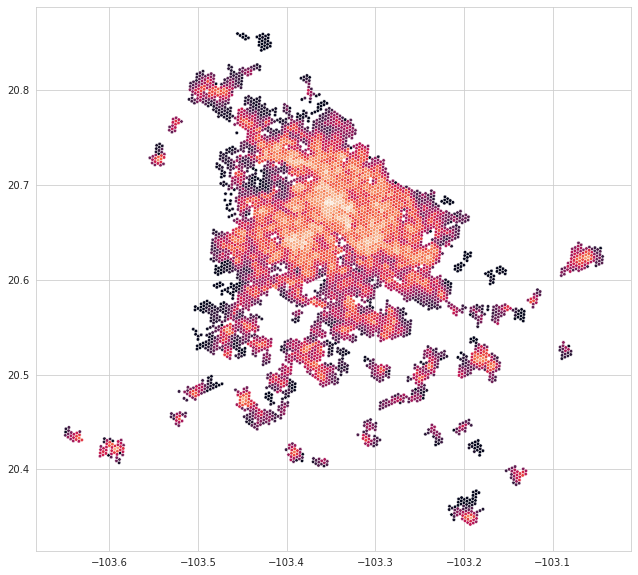

In [137]:
column_analysis = '15_min_analysis'

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
hex_esda.plot(column=column_analysis, linewidth=0.4, ax=ax)

<AxesSubplot:>

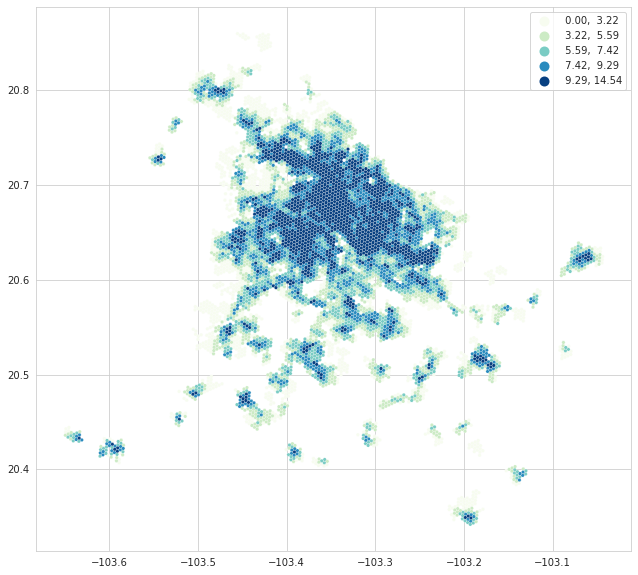

In [138]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
hex_esda.plot(column=column_analysis, 
              linewidth=0.2, scheme='Quantiles', 
              k=5, cmap='GnBu', legend=True, ax=ax)

### Spatial autocorrelation

In [139]:
import libpysal as lps

df = hex_esda
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 700, ' is an island (no neighbors)')
('WARNING: ', 1093, ' is an island (no neighbors)')


/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [140]:
y = df[column_analysis]
ylag = lps.weights.lag_spatial(wq, y)

In [141]:
ylag

array([ 0.        ,  2.99065171,  0.        , ..., 11.33310298,
       12.88943765, 13.27288459])

In [142]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

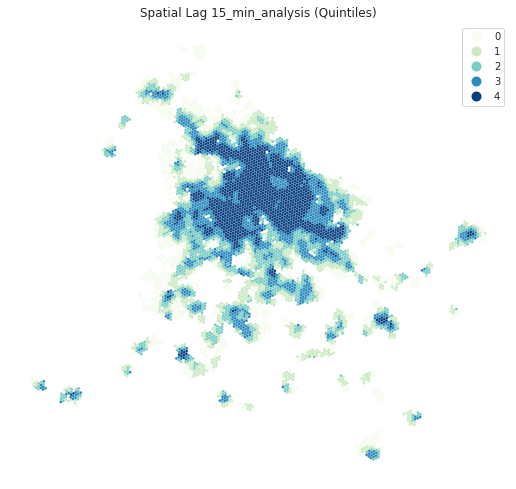

In [143]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title(f"Spatial Lag {column_analysis} (Quintiles)")

plt.show()

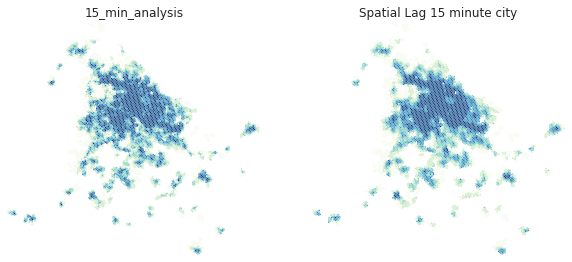

In [144]:
import numpy as np

df[f'lag_{column_analysis}'] = ylag
f,ax = plt.subplots(1,2,figsize=(10,8))
df.plot(column=column_analysis, ax=ax[0], linewidth=0.1,
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title(column_analysis)
df.plot(column=f'lag_{column_analysis}', ax=ax[1], linewidth=0.1,
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag 15 minute city")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

### Global spatial autocorrelation

In [145]:
y.median()

6.5

In [146]:
y_above = y > y.median()
sum(y_above)

2999

In [147]:
y_below = y < y.median()
sum(y_below)

2997

In [148]:
labels = ["0 Low", "1 High"]
y_above = [labels[i] for i in 1*y_above] 
df['yb'] = y_above

<AxesSubplot:>

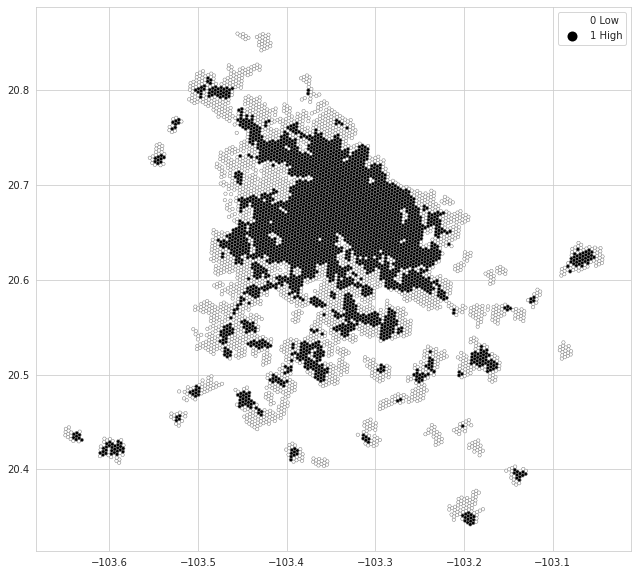

In [149]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', linewidth=0.5, edgecolor='grey', legend=True, ax=ax)

In [150]:
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [151]:
jc.mean_bb

3910.6376376376375

Text(0.5, 0, 'BB Counts')

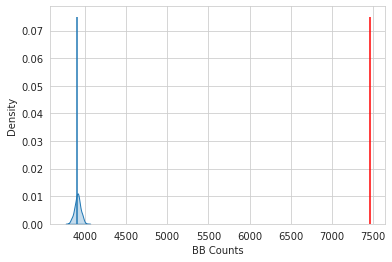

In [152]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

#### pseudo p-value

In [153]:
jc.p_sim_bb

0.001

### continuous case

In [154]:
wq.transform = 'r'

('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 700, ' is an island (no neighbors)')
('WARNING: ', 1093, ' is an island (no neighbors)')


In [155]:
y = df[column_analysis]

#### Moran's I

In [156]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.8577596887756972

Text(0.5, 0, "Moran's I")

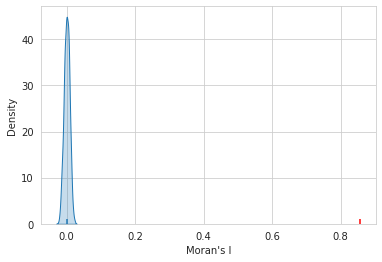

In [157]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [158]:
mi.p_sim

0.001

### Local auto-correlation

In [159]:
np.random.seed(12345)

In [160]:
wq.transform = 'r'
lag_time = lps.weights.lag_spatial(wq, df[column_analysis])

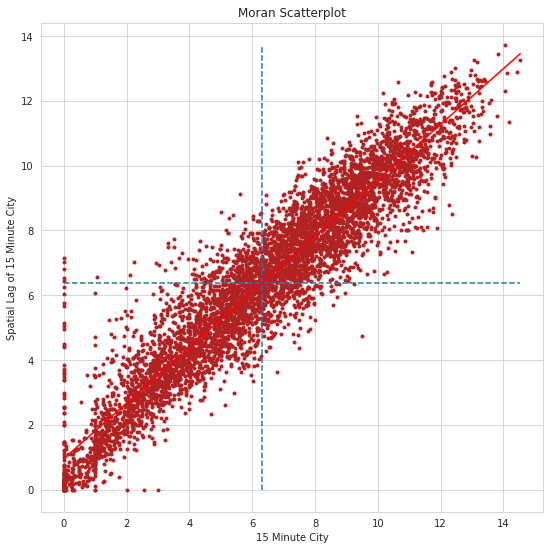

In [161]:
time = df[column_analysis]
b, a = np.polyfit(time, lag_time, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(time, lag_time, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(time.mean(), lag_time.min(), lag_time.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_time.mean(), time.min(), time.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(time, a + b*time, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of 15 Minute City')
plt.xlabel('15 Minute City')
plt.show()

In [162]:
wq = lps.weights.distance.Kernel.from_dataframe(df[[column_analysis,'geometry']])

li = esda.moran.Moran_Local(y, wq)

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
  warnings.warn(message)


In [163]:
li.q

array([3, 3, 3, ..., 1, 1, 1])

In [164]:
(li.p_sim < 0.05).sum()

3637

In [165]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [166]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

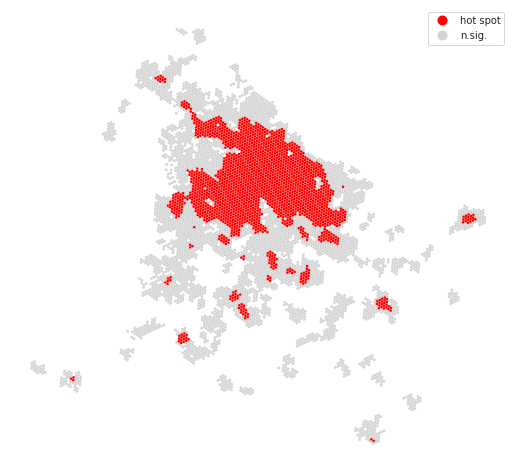

In [167]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [168]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

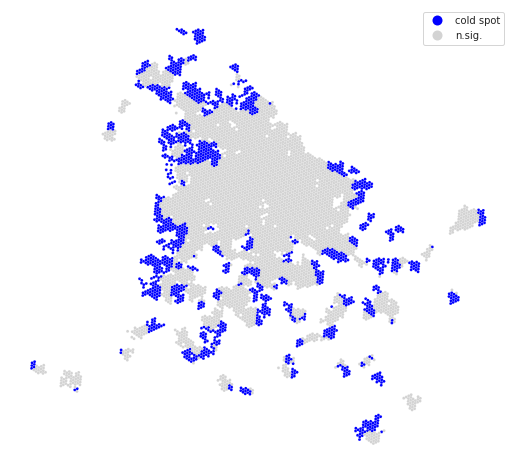

In [169]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [170]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 3, ..., 1, 1, 1])

In [171]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

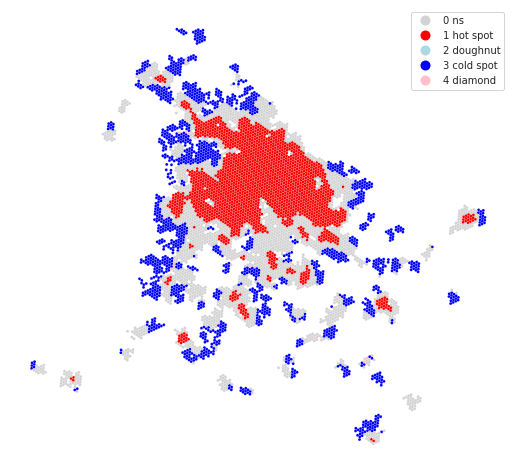

In [172]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [111]:
import contextily
%matplotlib inline

In [112]:
column_analysis = 'raw_15_min_analysis'

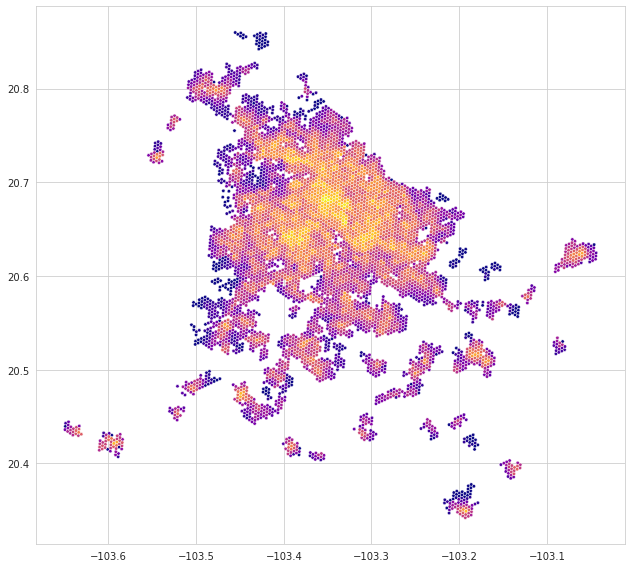

In [175]:
f,ax = plt.subplots(figsize=(12,8), sharex=True, sharey=True)

hex_esda.plot(column_analysis, linewidth=0.4,
              ax=ax, cmap='plasma')

# ax.imshow(basemap, extent=extent, interpolation='bilinear')
# ax.axis(hex_dist_res9.total_bounds[[0,2,1,3]])

f.tight_layout()
plt.show()

### Assigning labels

#### Download municipality limits

In [116]:
schema = 'metropolis'
folder = 'metro_list'

query = f"SELECT * FROM {schema}.{folder} WHERE \"city\" LIKE \'{c}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')
mun_gdf = mun_gdf.set_crs("EPSG:4326")
print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


In [117]:
mun_gdf.crs == hex_dist_res9.crs

True

#### Create centroids from hex_bins

In [118]:
hex_esda = hex_esda.to_crs("EPSG:6372")
centroid = hex_esda.set_index('hex_id_9').centroid
hex_esda = hex_esda.to_crs("EPSG:4326")

In [119]:
centroid = gpd.GeoDataFrame(geometry=centroid)
centroid = centroid.to_crs("EPSG:4326")
print(centroid.shape)
centroid.head(2)

(6003, 1)


,geometry
hex_id_9,
8949ab584cfffff,POINT (-103.46939 20.58969)
8949abc9993ffff,POINT (-103.64906 20.43949)


#### Spatial join

In [120]:
centroid = centroid.reset_index()
centroid_mun = gpd.sjoin(centroid, mun_gdf)
print(centroid_mun.shape)
centroid_mun.head(2)

(6001, 8)


,hex_id_9,geometry,index_right,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,city
0,8949ab584cfffff,POINT (-103.46939 20.58969),5,14097,14,097,Tlajomulco de Zúñiga,Guadalajara
3,8949ab5a393ffff,POINT (-103.50288 20.57182),5,14097,14,097,Tlajomulco de Zúñiga,Guadalajara


In [121]:
hex_esda_geosil = pd.merge(hex_esda, centroid_mun[['hex_id_9','NOMGEO']], on='hex_id_9')

### Soilhouettes scores

In [122]:
from sklearn.metrics import silhouette_samples

silhouettes = silhouette_samples(hex_esda_geosil[[column_analysis]].values, hex_esda_geosil.NOMGEO)

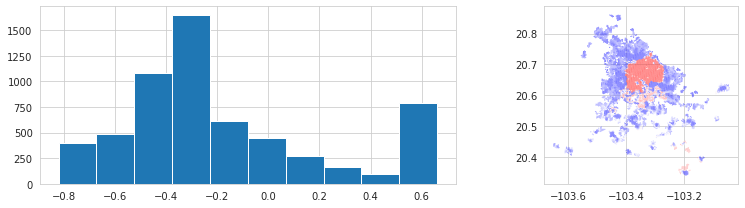

In [124]:
f,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].hist(silhouettes)
hex_esda_geosil.plot(silhouettes, ax=ax[1], cmap='bwr', 
          vmin=-.5, vmax=.5, alpha=.6, linewidth=0.1)
# ax[1].imshow(hex_dist_res9_geosil, interpolation='bilinear')
# ax[1].axis(hex_dist_res9_geosil[column_analysis])
f.tight_layout()
plt.show()

#### Data driven groups

In [125]:
from sklearn.cluster import KMeans

data_driven_clustering = KMeans(n_clusters=10).fit(hex_esda_geosil[[column_analysis]].values)
data_labels = data_driven_clustering.labels_
data_silhouettes = silhouette_samples(hex_esda_geosil[[column_analysis]].values, 
                                      data_labels)

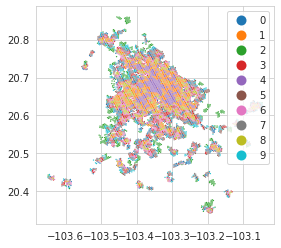

In [127]:
hex_esda_geosil.plot(data_labels, linewidth=0.1,
                     categorical=True, legend=True)
plt.show()

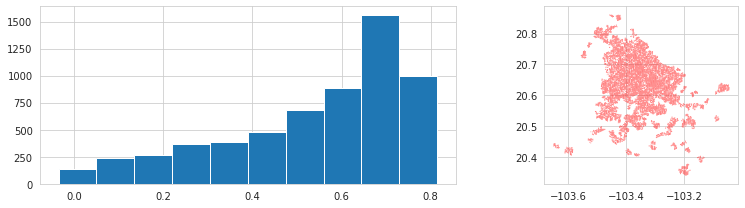

In [128]:
f,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].hist(data_silhouettes)
hex_esda_geosil.plot(data_silhouettes, ax=ax[1], cmap='bwr', 
          vmin=-.5, vmax=.5, alpha=.6, linewidth=0.1)
#vax[1].imshow(basemap, extent=extent, interpolation='bilinear')
#vax[1].axis(deep.total_bounds[[0,2,1,3]])
f.tight_layout()
plt.show()

In [188]:
hex_esda_geosil[column_analysis].values.reshape((-1,1)).shape

(6001, 1)

In [191]:
hex_esda_geosil.NOMGEO.values.reshape((-1,1)).shape

(6001, 1)

In [196]:
from esda.silhouettes import *

nearest_label = nearest_label(hex_esda_geosil[[column_analysis]].values,
                             hex_esda_geosil.NOMGEO.values)

Text(0.5, 1.0, 'Most similar *other* mun to hex ($\\hat{k}_i$)')

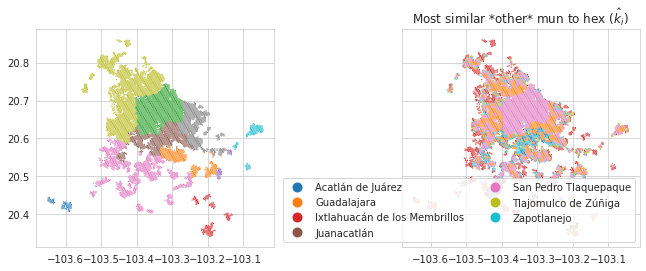

In [201]:
# nearest_outside_state = np.asarray(focus_states)[nearest_label]
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot('NOMGEO', ax=ax[0], categorical=True, linewidth=0.1)
hex_esda_geosil.plot(nearest_label, ax=ax[1],
               legend=True, categorical=True, linewidth=0.1,
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most similar *other* mun to hex ($\hat{k}_i$)')

In [203]:
wq =  lps.weights.Queen.from_dataframe(hex_esda_geosil)
# wq = lps.weights.distance.Kernel.from_dataframe(df[[column_analysis,'geometry']])


/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [204]:
path_silhouette = esda.path_silhouette(hex_esda_geosil[[column_analysis]].values, 
                                       hex_esda_geosil.NOMGEO, wq)

/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


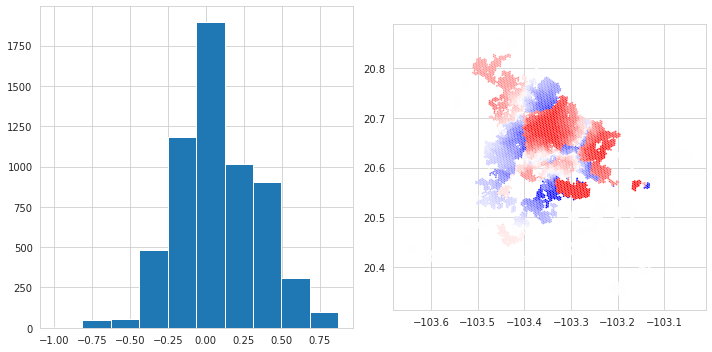

In [206]:
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(path_silhouette)
hex_esda_geosil.plot(path_silhouette, ax=ax[1], cmap='bwr',
                     vmin=-.5, vmax=.5, linewidth=0.1)
# ax[1].imshow(basemap, extent=extent, interpolation='bilinear')
# ax[1].axis(deep.total_bounds[[0,2,1,3]])
f.tight_layout()
plt.show()

In [209]:
path_silhouette, next_best_path = esda.path_silhouette(hex_esda_geosil[[column_analysis]].values, 
                                                       hex_esda_geosil.NOMGEO, wq, 
                                                       return_nbfc=True)

/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


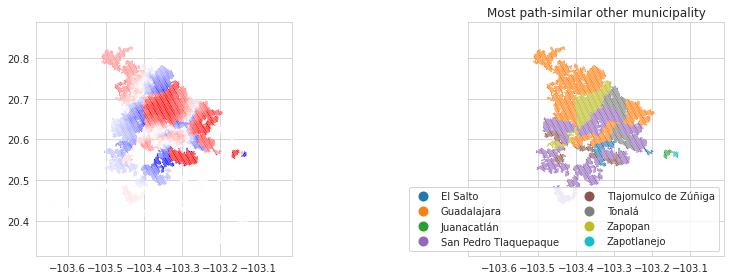

In [211]:
next_best_path_state = np.asarray(next_best_path)
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot(path_silhouette, ax=ax[0], linewidth=0.1,
                     cmap='bwr', vmin=-.5, vmax=.5)
hex_esda_geosil.plot(next_best_path_state, ax=ax[1], linewidth=0.1,
               legend=True, categorical=True, 
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most path-similar other municipality')

f.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most similar *other* mun to hex ($\\hat{k}_i$)')

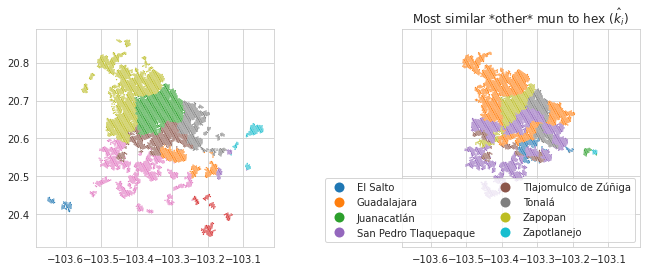

In [213]:
nearest_outside_state = np.asarray(next_best_path)
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot('NOMGEO', ax=ax[0],
                     linewidth=0.1, categorical=True)
hex_esda_geosil.plot(nearest_outside_state, ax=ax[1],
               legend=True, categorical=True, linewidth=0.1,
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most similar *other* mun to hex ($\hat{k}_i$)')

In [214]:
import inequality
import libpysal

In [215]:
column_analysis = '15_min_analysis'

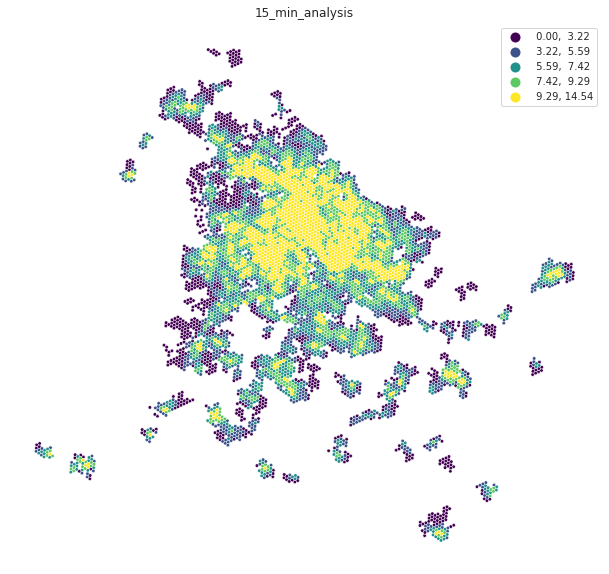

In [218]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

hex_esda.plot(column=column_analysis,k=5, linewidth=0.4,
                   scheme='Quantiles',legend=True, ax=ax)

ax.set_title(column_analysis)

ax.set_axis_off()

In [219]:
gini_column_analysis = inequality.gini.Gini(hex_esda[column_analysis])

In [220]:
gini_column_analysis.g

0.2943358702066658

In [221]:
inequality.gini.Gini_Spatial

inequality.gini.Gini_Spatial

In [222]:
regimes = hex_esda[[column_analysis,'geometry']]

In [223]:
wq = libpysal.weights.Queen.from_dataframe(regimes)

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [224]:
gs = inequality.gini.Gini_Spatial(hex_esda[column_analysis],wq)

In [225]:
gs.p_sim

0.01

In [64]:
import segregation

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/'
hex_pop = gpd.read_file(grl_dir+'Info_Sociodemografica/Analisis/Block_Census/Guadalajara_Census_10_20_BlockAnalysis_res9.geojson', driver='GeoJSON')
print(hex_pop.shape)
hex_pop.head(2)

(6003, 430)


,hex_id_9,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8949ab49dd3ffff,1213.0,619.0,594.0,57.0,18.0,28.0,1147.0,593.0,554.0,...,None,0.797235,0.168203,0.077868,0.0,None,0.797235,None,35.874628,"POLYGON ((-103.44558 20.81956, -103.44436 20.8..."
1,8949aa25017ffff,1616.0,832.0,784.0,75.0,30.0,36.0,1537.0,795.0,742.0,...,None,0.738994,0.218553,-0.214349,0.0,None,0.738994,None,42.049387,"POLYGON ((-103.42468 20.45386, -103.42346 20.4..."


In [68]:
hex_dist_pop_res9 = pd.merge(hex_dist_res9, hex_pop[['hex_id_9','pobtot']], on='hex_id_9')